In [3]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('oppo-data.csv')

In [3]:
def Normalization (cluster):
    cluster_dim = cluster.shape
    cluster_mean = np.mean(cluster,0)
    cluster_mean_mat = np.matlib.repmat(cluster_mean,cluster_dim[0],1)
    cluster1 = (cluster-cluster_mean_mat)/np.std(cluster) - cluster_mean_mat
    return cluster1

In [4]:
data = Normalization(df)

In [5]:
X = data.iloc[:,1:]
y = data['result']

In [7]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 21, step=1)
selector = selector.fit(X, y)
print(selector.support_) 
print(selector.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Feature ranking:
1. feature 0 (0.304541)
2. feature 1 (0.252571)
3. feature 3 (0.229517)
4. feature 2 (0.213371)


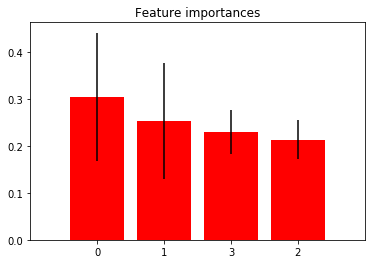

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
df = pd.read_csv('team2coach-data.csv')
data = df.iloc[:,1:]
def Normalization (cluster):
    cluster_dim = cluster.shape
    cluster_mean = np.mean(cluster,0)
    cluster_mean_mat = np.matlib.repmat(cluster_mean,cluster_dim[0],1)
    cluster1 = (cluster-cluster_mean_mat)/np.std(cluster) - cluster_mean_mat
    return cluster1
data = Normalization(data)

X = data
y = df['result']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
df = pd.read_csv('oppo-data.csv')
data = df.iloc[:,1:]
def Normalization (cluster):
    cluster_dim = cluster.shape
    cluster_mean = np.mean(cluster,0)
    cluster_mean_mat = np.matlib.repmat(cluster_mean,cluster_dim[0],1)
    cluster1 = (cluster-cluster_mean_mat)/np.std(cluster) - cluster_mean_mat
    return cluster1
data = Normalization(data)

X = data
y = df['result']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()